In [ ]:
!pip install datasets

**<h3>Importing Libraries and Performing Basic Cleaning</h3>**

In [2]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

**<h3>Salary Distribution by Job Roles</h3>**

In [18]:
df_india = df[(df['job_country']== 'India')].dropna(subset=['salary_year_avg'])

In [19]:
job_titles = df_india['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

**<h3>Top 6 Job Roles</h3>**

In [24]:
top_6 = df_india[df_india['job_title_short'].isin(job_titles)]
job_order = top_6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

**<h3>Plotting Graph</h3>**

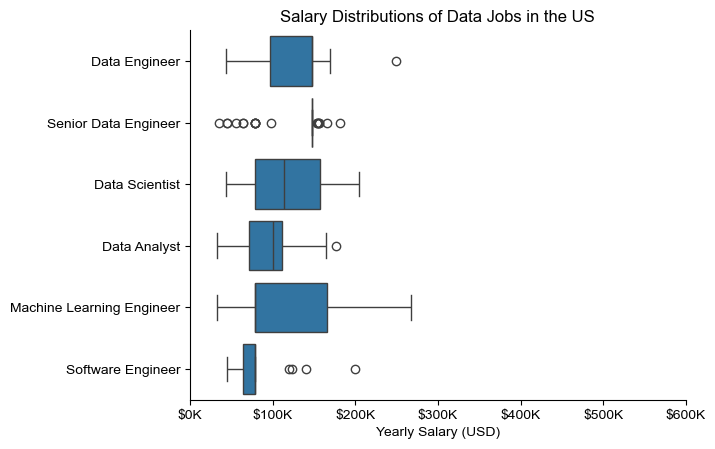

In [25]:
sns.boxplot(data=df_india, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [27]:
df_da = df[(df['job_title_short'] == 'Data Analyst')  & (df['job_country']== 'India')].copy()
df_da = df_da.dropna(subset=['salary_year_avg'])

In [32]:
df_da =df_da.explode('job_skills')
df_da[['salary_year_avg' , 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


**<h3>Median Salary vs Skills in Data Analyst</h3>**

In [47]:
top_pay = df_da.groupby('job_skills')['salary_year_avg'].agg(['count' , 'median']).sort_values(by='median' ,ascending=False)
top_pay = top_pay.head(10)
top_pay 

,count,median
job_skills,,
postgresql,1,165000.0
pyspark,1,165000.0
gitlab,1,165000.0
linux,1,165000.0
mysql,1,165000.0
gdpr,2,163782.0
mongodb,6,163782.0
scala,3,163782.0
neo4j,1,163782.0


In [48]:
top_skills= df_da.groupby('job_skills')['salary_year_avg'].agg(['count' , 'median']).sort_values(by='count' ,ascending=False)
top_skills= top_skills.head(10)
top_skills

,count,median
job_skills,,
sql,46,96050.0
excel,39,98500.0
python,36,96050.0
tableau,20,108087.5
r,18,79200.0
power bi,17,111175.0
azure,15,93600.0
aws,12,79200.0
oracle,11,79200.0


**<h3>Plotting Graph</h3>**

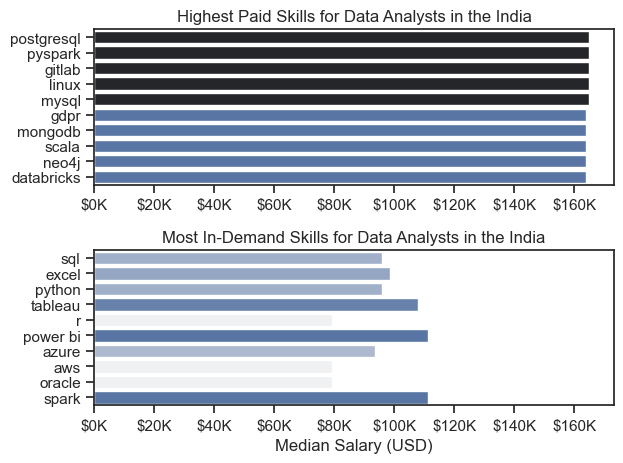

In [49]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=top_pay, x='median', y=top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=top_skills, x='median', y=top_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()

**<h3>Enhancing Graph using ChatGPT</h3>**

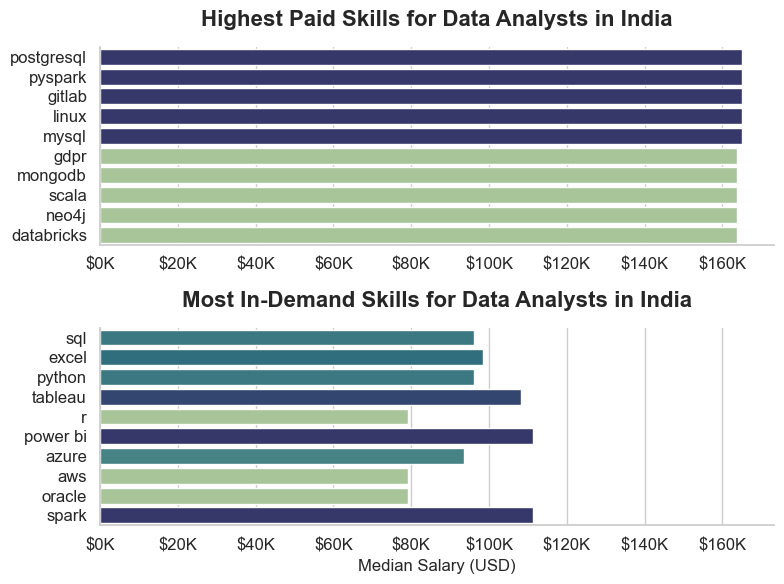

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming top_pay and top_skills are defined DataFrames

# Create figure and axes
fig, ax = plt.subplots(2, 1, figsize=(8, 6))  # Adjust figure size as needed

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=top_pay, x='median', y=top_pay.index, hue='median', ax=ax[0], palette='crest')
ax[0].legend().remove()
ax[0].set_title('Highest Paid Skills for Data Analysts in India', fontsize=16, fontweight='bold', pad=15)
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Analysts
sns.barplot(data=top_skills, x='median', y=top_skills.index, hue='median', ax=ax[1], palette='crest')
ax[1].legend().remove()
ax[1].set_title('Most In-Demand Skills for Data Analysts in India', fontsize=16, fontweight='bold', pad=15)
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Adjust tick parameters
for axes in ax:
    axes.tick_params(axis='both', which='major', labelsize=12)

# Remove spines
sns.despine()

# Set overall style
sns.set(style='whitegrid')

# Adjust layout and display
plt.tight_layout()
plt.show()
